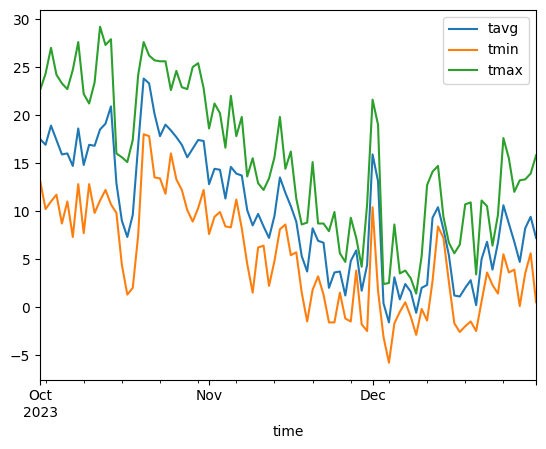

In [31]:
from datetime import datetime
import matplotlib.pyplot as plt
from meteostat import Point, Daily
import pandas as pd
from meteostat import Stations

RANDOM_STATE = 42
START_DATE = '2022-01-01'
END_DATE = '2022-12-31'


In [21]:
stations = Stations()
stations = stations.fetch().drop(columns=['country', 'region', 'wmo', 'icao', 'elevation', 'timezone'])
stations[stations['daily_start'] < START_DATE][stations['daily_end'] > END_DATE]

stations

,name,latitude,longitude,hourly_start,hourly_end,daily_start,daily_end,monthly_start,monthly_end
id,,,,,,,,,
00FAY,Holden Agdm,53.1900,-112.2500,2020-01-01,2024-05-23,2002-11-01,2024-03-13,2003-01-01,2022-01-01
00TG6,Athabasca 1,54.7200,-113.2900,NaT,NaT,2000-01-01,2022-07-12,2000-01-01,2010-01-01
01001,Jan Mayen,70.9333,-8.6667,1931-01-01,2024-04-17,1921-12-31,2024-05-19,1922-01-01,2022-01-01
01002,Grahuken,79.7833,14.4667,1986-11-09,2024-04-17,2010-10-07,2020-08-17,NaT,NaT
01003,Hornsund,77.0000,15.5000,1985-06-01,2024-04-17,2009-11-26,2020-08-31,2016-01-01,2017-01-01
...,...,...,...,...,...,...,...,...,...
ZX07Q,Okotoks,50.7300,-113.9600,NaT,NaT,2000-01-01,2022-12-02,2000-01-01,2021-01-01
ZXYDC,Bonavista,48.6700,-53.1100,2020-01-01,2022-12-14,2006-07-09,2022-12-11,2006-01-01,2022-01-01
ZYC17,Kingston Airport,44.2300,-76.6000,2020-01-01,2022-12-15,2018-10-29,2022-12-12,2019-01-01,2022-01-01


In [46]:
daily_data = []
stations = stations.sample(10, random_state=RANDOM_STATE)[['name', 'latitude', 'longitude']]
for i, id in enumerate(stations.index):
    print(i, '/ 10')
    daily_data.append(Daily(id, START_DATE, END_DATE))
daily_df = [daily.fetch() for daily in daily_data]

0 / 10
1 / 10
2 / 10
3 / 10
4 / 10
5 / 10
6 / 10
7 / 10
8 / 10
9 / 10


In [77]:
merged_df = pd.DataFrame(columns=list(stations.columns) + list(daily_df[0].index.astype(str)))
merged_df['name'] = stations['name']
merged_df['latitude'] = stations['latitude']
merged_df['longitude'] = stations['longitude']

for i, daily in zip(stations.index, daily_df):
    merged_df.loc[i,START_DATE:END_DATE] = daily['tavg']
merged_df

,name,latitude,longitude,2022-01-01,2022-01-02,2022-01-03,2022-01-04,2022-01-05,2022-01-06,2022-01-07,...,2022-12-22,2022-12-23,2022-12-24,2022-12-25,2022-12-26,2022-12-27,2022-12-28,2022-12-29,2022-12-30,2022-12-31
id,,,,,,,,,,,,,,,,,,,,,
D4712,Simonswald-Obersimonswald,48.0821,8.0919,10.8,11.1,8.4,9.1,1.0,-1.3,-1.7,...,8.4,10.2,8.7,10.8,9.4,4.4,7.3,9.3,8.6,14.6
02745,Salla Naruska Talluskatakoski,67.1667,29.1833,-8.8,-19.7,-24.0,-15.2,-13.7,-19.2,-11.7,...,-6.9,-6.7,-10.6,-13.2,-11.3,-13.3,-9.5,-8.0,-6.9,-6.0
94955,Sheffield,-41.4000,146.3000,16.2,13.3,11.4,12.5,14.6,13.5,16.5,...,11.7,12.9,13.3,13.5,16.2,17.8,14.3,11.0,12.5,15.8
33829,Tiraspol / Blijnii Hutor,46.9000,29.6000,4.2,1.3,3.7,6.1,8.5,4.6,0.0,...,2.4,1.5,1.3,3.3,3.7,4.4,1.3,0.9,0.9,2.4
10454,Wernigerode,51.8500,10.7667,11.9,11.9,8.7,6.6,3.2,1.4,2.1,...,8.1,8.5,8.2,7.9,9.1,4.5,6.6,9.7,7.5,15.1
11692,Namest Nad Oslavou,49.1667,16.1333,9.3,5.4,7.6,7.1,3.2,-0.3,-4.3,...,-1.1,2.9,5.7,4.9,5.3,3.4,-0.4,-1.2,0.1,3.6
KL350,Big Bear City,34.2638,-116.8560,-3.3,-3.5,-0.8,3.3,2.3,1.8,3.2,...,0.6,1.5,2.0,3.2,3.4,5.4,1.8,1.3,5.8,3.4
98431,Calapan,13.4167,121.1833,25.7,25.4,25.5,26.0,26.3,26.4,26.4,...,26.4,25.3,24.4,24.2,24.0,23.9,24.5,24.6,25.9,26.2
ESGI0,Alingsås / Alingsas / Bälinge,57.9498,12.5780,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
